<a href="https://colab.research.google.com/github/marlonandersonsilva/evasaomlmestrado/blob/main/Aplica%C3%A7%C3%A3o_R_Logistica%2CNaise_Bayer%2CRandonForest%2CXgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup 

In [ ]:
 # Main libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
import seaborn as sns
from sklearn.linear_model import LinearRegression
import glob
from google.colab import files
from google.colab import drive
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
import seaborn as sns
import datetime
from sklearn import preprocessing
from sklearn import utils
import math
from math import*
from scipy.stats import mode
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from pandas.core.dtypes.common import classes
from scipy.stats import mode

In [ ]:
# Connect to Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# permitir visualizar todas as linhas
pd.options.display.max_rows = None

In [ ]:
# permitir visualizar todas as colunas
pd.options.display.max_columns = None


# Carregar dados

In [ ]:
#train = pd.read_csv(,engine='c')
df_main = pd.read_excel("/content/gdrive/My Drive/Dados _Atualizado_2712.xlsx")

In [ ]:
df_main.head(3)

,emancipado,Percentual_Frequencia,DESC_SIT_MATRICULA_PERIODO,Situacao_Ultimo_Periodo_Letivo,Ultimo_Periodo_Letivo_Presente,Ultima_Aula_Presente,CH_Obrigatoria_Cursada,F_Coeficiente_Rendimento,Carga_Hor_Prevista,Carga_Hor_Complementar_Cumprida,clDesc_Curso,clNome_Pessoa,clAgrupamento,Qtd_Periodos,clPeriodo_Let_ini,DT_Rematricula,dt_matricula,Desc_Turno_Ini,Desc_Modalidade_Curso,Desc_Cota,Desc_Renda_Per_Capita_SIG,Nivel_Ensino,Desc_Regime_Internato,Desc_Sit_Matricula,Desc_Area_Procedencia_Escola_Origem,Desc_Renda_Per_Capita_PNP,Desc_Renda_Per_Capita_INEP,Desc_Renda_Per_Capita,Desc_Tipo_Escola_Origem,Desc_renda_familiar,Desc_Estado_Civil_Pais,Desc_Estado_Civil,Desc_Turno,Cod_Turno,Ch_Eletiva_Cursada,Ch_Eletiva_Cumprida,Ch_Eletiva_Prevista,Desc_Naturalidade,Desc_Escola_Pos_Graduacao,Desc_Escola_Graduacao,Desc_Escola_2_Grau,Desc_Escola_1_Grau,TEXTO_ENDERECO,Nome_responsavel,__DIPLOMA_N_LIVRO_N_FOLHA,Cod_Cracha,__DIPLOMA_N_REGISTRO,__DIPLOMA_PASTA,DESC_NACIONALIDADE,Tipo_Concomitancia,Regime_Internato,Coeficiente_Rendimento,Emancipado,Idade,Tipo_Sanguineo,Possui_Foto_1,Csm,Regiao_Militar,Ano_Reservista,Reservista,Secao_Ele,Zona_Ele,Estado_Identidade,Titulo_Ele,Estado_Reservista,Dt_Nascimento_1,Sexo_1,N_Filhos,Cod_Cidade_1,Cod_Estado_Civil,Cod_Nacionalidade,Cod_Grau_Instrucao,Profissao,Cod_Pessoa_1,Desc_Cor,Pis_Pasep,Conta_Corrente_1,Cod_Agencia_1,Cod_Banco_1,N_Membros_Familia,Ocupacao_Responsavel,necessidades_especiais,Sindrome_Down,Condutas_Tipicas,Superdotado,Outras_Necessidades,Necessidade_Multipla,Necessidade_Mental,Necessidade_Auditiva,Necessidade_Visual,Necessidade_Fisica,Renda_Per_Capita_PNP,Renda_Per_Capita_Inep,Renda_Per_Capita_Sig,Renda_Per_Capita,N_Pasta,Tipo_Escola_Origem_1,Renda_Familiar_1,Mae_Falecida,Pai_Falecido,Cod_Grau_Instrucao_Mae,Cod_Grau_Instrucao_Pai,Cod_Estado_Civil_Pais,Cod_Escola_2_Grau,Ano_Conclusao_2_Grau,Cod_Escola_1_Grau,Ano_Conclusao_1_Grau,Desc_Curso_Pos_Graduacao,Cod_Escola_Pos_Graduacao,Ano_Conclusao_Pos_Graduacao,Desc_Curso_2_Grau,Desc_Curso_Graduacao,Ano_Conclusao_Graduacao,Area_Procedencia_Escola_Origem,Cor,Cod_Escola_Graduacao,Cod_Aluno_1,Conta_Corrente,Cod_Agencia,Cod_Banco,Desc_Forma_Ingresso_Matricula,Cod_Forma_Ingresso_Matricula,Texto_cidade,Cod_cidade,sexo,Tipo_escola_Origem,Renda_Familiar,Cod_Aluno,desc_curso,Sigla_Curso,Dt_Nascimento,Periodo_Atual,Cod_turma,cod_turma_Atual,Periodo_Let_Atual,Ano_Let_Atual,Desc_Instituicao,Cod_instituicao,Cod_curso,__Dt_Conclusao_Curso,Sit_Matricula,Periodo_letivo_ini,ano_letivo_ini,Matricula,Curso_Estrutura_Curso,Matriz_Estrutura_Curso,Desc_Matriz_Curricular,__Dt_Conclusao_Ensino_Medio,cod_matricula,Possui_Foto,Cod_Pessoa
0,Renovou matrícula: 21/04/2021,NaN,Matriculado,Matriculado,2021/2,2021-10-20,0.0,0.0,0.0,0.0,TQJG - TÉCNICO EM QUALIDADE - SUBSEQUENTE,20211TQJG0441 - Adeilson Domingos da Paz,12 - IFPE / JABOATÃO DOS GUARARAPES,3.0,2021/1,2021-04-21,2021-04-21,Noturno,Subseqüente,"Aluno de Escola Pública com renda > 1,5 SM por...",NaN,Técnico,Não Internos,Matriculado,Urbana,NaN,NaN,NaN,Pública Municipal,NaN,NaN,CASADO (A),Noturno,N,0.0,0.0,0.0,JABOATÃO DOS GUARARAPES - PE,NaN,NaN,ESCOLA MUNICIPAL HUMBERTO BARRADAS,ESCOLA MUNICIPAL HUMBERTO BARRADAS,"Rua Manuel de Sena, 316, Santo Aleixo, CASA, J...",NaN,NaN,20211TQJG0441,NaN,NaN,Brasileira,0.0,0.0,9.55,0.0,49.0,O+,0.0,NaN,NaN,NaN,NaN,161.0,11.0,PE,41667400892.0,NaN,1972-03-09,M,2.0,5288.0,C,BR,4.0,NaN,215716.0,Parda,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,0.0,1.0,12.0,15.0,NaN,33678.0,1996.0,33678.0,NaN,NaN,NaN,NaN,Técnico em Contabilidade,NaN,NaN,0.0,PAR,NaN,195697.0,NaN,NaN,NaN,Vestibular / Exame de Seleção,VESTIBULAR,JABOATÃO DOS GUARARAPES - PE,5288.0,M,M,NaN,195697.0,TÉCNICO EM QUALIDADE - SUBSEQUENTE,TQJG,1972-03-09,2.0,2021.2TQJG.2N,2021.2TQJG.2N,2.0,2021.0,IFPE / JABOATÃO DOS GUARARAPES,12.0,1420.0,NaT,0.0,1.0,2021.0,20211TQJG0441,371.0,371.0,5155CURSO TÉCNICO EM QUALIDADE SUB JG (2020/1),1996.0,217267.0,0.0,215716.0
1,Trancamento de Período: 09/

Para descartar colunas nas quais mais de 30% dos valores estão ausentes

In [ ]:
lista_abs= df_main.dropna(thresh=len(df_main)*0.7, axis=1)

In [ ]:
lista_abs.head(2)

,emancipado,DESC_SIT_MATRICULA_PERIODO,Situacao_Ultimo_Periodo_Letivo,Ultimo_Periodo_Letivo_Presente,Ultima_Aula_Presente,CH_Obrigatoria_Cursada,F_Coeficiente_Rendimento,Carga_Hor_Prevista,Carga_Hor_Complementar_Cumprida,clDesc_Curso,clNome_Pessoa,clAgrupamento,Qtd_Periodos,clPeriodo_Let_ini,DT_Rematricula,dt_matricula,Desc_Turno_Ini,Desc_Modalidade_Curso,Desc_Cota,Nivel_Ensino,Desc_Regime_Internato,Desc_Sit_Matricula,Desc_Estado_Civil,Desc_Turno,Cod_Turno,Ch_Eletiva_Cursada,Ch_Eletiva_Cumprida,Ch_Eletiva_Prevista,Desc_Naturalidade,TEXTO_ENDERECO,Cod_Cracha,DESC_NACIONALIDADE,Tipo_Concomitancia,Regime_Internato,Coeficiente_Rendimento,Emancipado,Idade,Possui_Foto_1,Estado_Identidade,Dt_Nascimento_1,Sexo_1,Cod_Cidade_1,Cod_Estado_Civil,Cod_Nacionalidade,Cod_Pessoa_1,Desc_Cor,Mae_Falecida,Pai_Falecido,Cor,Cod_Aluno_1,Desc_Forma_Ingresso_Matricula,Cod_Forma_Ingresso_Matricula,Texto_cidade,Cod_cidade,sexo,Cod_Aluno,desc_curso,Sigla_Curso,Dt_Nascimento,Periodo_Atual,Cod_turma,cod_turma_Atual,Periodo_Let_Atual,Ano_Let_Atual,Desc_Instituicao,Cod_instituicao,Cod_curso,Sit_Matricula,Periodo_letivo_ini,ano_letivo_ini,Matricula,Curso_Estrutura_Curso,Matriz_Estrutura_Curso,Desc_Matriz_Curricular,cod_matricula,Possui_Foto,Cod_Pessoa
0,Renovou matrícula: 21/04/2021,Matriculado,Matriculado,2021/2,2021-10-20,0.0,0.0,0.0,0.0,TQJG - TÉCNICO EM QUALIDADE - SUBSEQUENTE,20211TQJG0441 - Adeilson Domingos da Paz,12 - IFPE / JABOATÃO DOS GUARARAPES,3.0,2021/1,2021-04-21,2021-04-21,Noturno,Subseqüente,"Aluno de Escola Pública com renda > 1,5 SM por...",Técnico,Não Internos,Matriculado,CASADO (A),Noturno,N,0.0,0.0,0.0,JABOATÃO DOS GUARARAPES - PE,"Rua Manuel de Sena, 316, Santo Aleixo, CASA, J...",20211TQJG0441,Brasileira,0.0,0.0,9.55,0.0,49.0,0.0,PE,1972-03-09,M,5288.0,C,BR,215716.0,Parda,0.0,1.0,PAR,195697.0,Vestibular / Exame de Seleção,VESTIBULAR,JABOATÃO DOS GUARARAPES - PE,5288.0,M,195697.0,TÉCNICO EM QUALIDADE - SUBSEQUENTE,TQJG,1972-03-09,2.0,2021.2TQJG.2N,2021.2TQJG.2N,2.0,2021.0,IFPE / JABOATÃO DOS GUARARAPES,12.0,1420.0,0.0,1.0,2021.0,20211TQJG0441,371.0,371.0,5155CURSO TÉCNICO EM QUALIDADE SUB JG (2020/1),217267.0,0.0,215716.0
1,Trancamento de Período: 09/03/2021,Trancado,Trancado,2020/1,2020-12-15,0.0,0.0,0.0,0.0,TIJG - TÉCNICO EM INFORMÁTICA PARA INTERNET - ...,20191TIJG0475 - Ademir Francisco dos Santos Ju...,12 - IFPE / JABOATÃO DOS GUARARAPES,3.0,2019/1,2019-04-09,2019-04-09,Vespertino,Subseqüente,"Aluno de Escola Pública com renda > 1,5 SM por...",Técnico,Não Internos,Trancado,SOLTEIRO (A),Vespertino,V,0.0,0.0,0.0,MORENO - PE,"Rua da Regeneração, 68, Tamboata, MORENO - PE,...",20191TIJG0475,Brasileira,0.0,0.0,5.36,0.0,23.0,0.0,PE,1998-06-18,M,5334.0,S,BR,187863.0,Preta,0.0,0.0,NEG,168775.0,Vestibular / Exame de Seleção,VESTIBULAR,MORENO - PE,5334.0,M,168775.0,TÉCNICO EM INFORMÁTICA PARA INTERNET - SUBSEQU...,TIJG,1998-06-18,3.0,2020.1.TIJG.3V,2020.1.TIJG.3V,1.0,2020.0,IFPE / JABOATÃO DOS GUARARAPES,12.0,1411.0,2.0,1.0,2019.0,20191TIJG0475,371.0,371.0,4716CURSO TÉCNICO EM INFORMÁTICA PARA INTERNET...,184614.0,0.0,187863.0


In [ ]:
lista_abs.columns= lista_abs.columns.str.strip().str.lower()

In [ ]:
lista_abs.isnull().sum()

emancipado                           0
desc_sit_matricula_periodo           0
situacao_ultimo_periodo_letivo       0
ultimo_periodo_letivo_presente       0
ultima_aula_presente                30
ch_obrigatoria_cursada               0
f_coeficiente_rendimento             0
carga_hor_prevista                   0
carga_hor_complementar_cumprida      0
cldesc_curso                         0
clnome_pessoa                        0
clagrupamento                        0
qtd_periodos                         0
clperiodo_let_ini                    0
dt_rematricula                       0
dt_matricula                         0
desc_turno_ini                       0
desc_modalidade_curso                0
desc_cota                            0
nivel_ensino                         0
desc_regime_internato                0
desc_sit_matricula                   0
desc_estado_civil                  137
desc_turno                           0
cod_turno                            0
ch_eletiva_cursada       

In [ ]:
lista_abs.columns

Index(['emancipado', 'desc_sit_matricula_periodo',
       'situacao_ultimo_periodo_letivo', 'ultimo_periodo_letivo_presente',
       'ultima_aula_presente', 'ch_obrigatoria_cursada',
       'f_coeficiente_rendimento', 'carga_hor_prevista',
       'carga_hor_complementar_cumprida', 'cldesc_curso', 'clnome_pessoa',
       'clagrupamento', 'qtd_periodos', 'clperiodo_let_ini', 'dt_rematricula',
       'dt_matricula', 'desc_turno_ini', 'desc_modalidade_curso', 'desc_cota',
       'nivel_ensino', 'desc_regime_internato', 'desc_sit_matricula',
       'desc_estado_civil', 'desc_turno', 'cod_turno', 'ch_eletiva_cursada',
       'ch_eletiva_cumprida', 'ch_eletiva_prevista', 'desc_naturalidade',
       'texto_endereco', 'cod_cracha', 'desc_nacionalidade',
       'tipo_concomitancia', 'regime_internato', 'coeficiente_rendimento',
       'emancipado', 'idade', 'possui_foto_1', 'estado_identidade',
       'dt_nascimento_1', 'sexo_1', 'cod_cidade_1', 'cod_estado_civil',
       'cod_nacionalidade', 'c

# Descricao da base

In [ ]:
lista_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   emancipado                       2473 non-null   object        
 1   desc_sit_matricula_periodo       2473 non-null   object        
 2   situacao_ultimo_periodo_letivo   2473 non-null   object        
 3   ultimo_periodo_letivo_presente   2473 non-null   object        
 4   ultima_aula_presente             2443 non-null   datetime64[ns]
 5   ch_obrigatoria_cursada           2473 non-null   float64       
 6   f_coeficiente_rendimento         2473 non-null   float64       
 7   carga_hor_prevista               2473 non-null   float64       
 8   carga_hor_complementar_cumprida  2473 non-null   float64       
 9   cldesc_curso                     2473 non-null   object        
 10  clnome_pessoa                    2473 non-null   object     

# Inclusão Colunas + importantes para a pesquisa

In [ ]:
lista_Work = lista_abs[['situacao_ultimo_periodo_letivo','qtd_periodos','coeficiente_rendimento','idade','cor','sexo','periodo_atual'
,'periodo_let_atual','ano_let_atual','cod_curso','sit_matricula','periodo_letivo_ini','ano_letivo_ini','matriz_estrutura_curso',
'cod_matricula','cod_pessoa','nivel_ensino','desc_estado_civil','desc_turno','desc_nacionalidade']]

In [ ]:
lista_Work.head(2)

,situacao_ultimo_periodo_letivo,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade
0,Matriculado,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira
1,Trancado,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira


In [ ]:
lista_Work['situacao_ultimo_periodo_letivo'] .value_counts()

Abandonou/Evadiu               639
Matriculado                    548
Aprovado                       509
Cancelado Voluntário           197
Trancado                       177
Em Aberto                      141
Concludente                    106
Jubilou                         87
Trancou                         26
Concluiu Projeto Final          25
Aprov. c/Dependência             6
Período Fechado                  6
Cancelou Compulsório             4
Concluiu                         1
Pediu Vínculo Institucional      1
Name: situacao_ultimo_periodo_letivo, dtype: int64

In [ ]:
lista_Work['classe'] = lista_Work['situacao_ultimo_periodo_letivo'].map = lista_Work['situacao_ultimo_periodo_letivo'].map({'Matriculado':0,
                             'Trancado':0,'Trancou':0,'Concluiu Projeto Final':0,'Aprov. c/Dependência':0,'Período Fechado':0,
                             'Cancelou Compulsório':0,
                             'Concluiu':0,'Abandonou/Evadiu':1,'Aprovado':0,'Em Aberto':0,'Jubilou':0,'Cancelado Voluntário':0,
                             'Concludente':0,'Pediu Vínculo Institucional':0}
                              ,na_action=None)
                             

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
lista_work_01=lista_Work.drop(columns=['situacao_ultimo_periodo_letivo'])

In [ ]:
lista_work_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2473 non-null   float64
 1   coeficiente_rendimento  2473 non-null   float64
 2   idade                   2473 non-null   float64
 3   cor                     2473 non-null   object 
 4   sexo                    2473 non-null   object 
 5   periodo_atual           2473 non-null   float64
 6   periodo_let_atual       2473 non-null   float64
 7   ano_let_atual           2473 non-null   float64
 8   cod_curso               2473 non-null   float64
 9   sit_matricula           2473 non-null   float64
 10  periodo_letivo_ini      2473 non-null   float64
 11  ano_letivo_ini          2473 non-null   float64
 12  matriz_estrutura_curso  2473 non-null   float64
 13  cod_matricula           2473 non-null   float64
 14  cod_pessoa              2473 non-null   

In [ ]:
print(lista_work_01['sit_matricula'])

0        0.0
1        2.0
2        9.0
3        6.0
4        0.0
5        9.0
6        9.0
7        0.0
8        6.0
9        0.0
10       2.0
11       0.0
12       9.0
13       6.0
14       6.0
15       2.0
16       6.0
17       0.0
18       0.0
19       0.0
20       3.0
21       0.0
22       2.0
23       3.0
24       3.0
25       9.0
26       9.0
27       9.0
28       9.0
29       6.0
30       9.0
31       0.0
32       6.0
33       6.0
34      10.0
35       9.0
36       6.0
37       0.0
38      10.0
39       6.0
40       6.0
41       6.0
42       9.0
43       0.0
44       9.0
45       3.0
46       5.0
47       9.0
48       0.0
49       0.0
50       6.0
51       0.0
52       5.0
53       9.0
54       3.0
55       2.0
56       6.0
57       0.0
58       6.0
59       9.0
60       9.0
61       9.0
62       0.0
63       6.0
64       6.0
65      10.0
66       0.0
67       6.0
68       9.0
69       9.0
70       9.0
71       3.0
72       0.0
73       9.0
74       6.0
75       0.0
76       0.0

In [ ]:
lista_work_01['sit_matricula'].value_counts()

0.0     685
9.0     639
6.0     553
2.0     202
10.0    196
5.0     106
3.0      88
20.0      4
Name: sit_matricula, dtype: int64

In [ ]:
lista_work_01['nivel_ensino'].value_counts()

Técnico          2075
Pós-Graduação     237
Superior          144
Básico             17
Name: nivel_ensino, dtype: int64

In [ ]:
lista_work_tec=lista_work_01.loc[lista_Work['nivel_ensino']=='Técnico']



In [ ]:
lista_work_tec.head()

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0
2,3.0,5.82,49.0,PAR,M,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,CASADO (A),Noturno,Brasileira,1
3,3.0,7.96,24.0,NAO,F,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0
4,3.0,0.00,28.0,NEG,F,1.0,2.0,2021.0,1411.0,0.0,2.0,2021.0,371.0,225509.0,222479.0,Técnico,DIVORCIADO (A),Noturno,Brasileira,0


# Preprocessamento

In [ ]:
New_lista_atualizada = lista_work_tec.select_dtypes(include=[object])
New_lista_atualizada.head(3)  

,cor,sexo,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade
0,PAR,M,Técnico,CASADO (A),Noturno,Brasileira
1,NEG,M,Técnico,SOLTEIRO (A),Vespertino,Brasileira
2,PAR,M,Técnico,CASADO (A),Noturno,Brasileira


In [ ]:
New_lista_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2472
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cor                 2075 non-null   object
 1   sexo                2075 non-null   object
 2   nivel_ensino        2075 non-null   object
 3   desc_estado_civil   2046 non-null   object
 4   desc_turno          2075 non-null   object
 5   desc_nacionalidade  2070 non-null   object
dtypes: object(6)
memory usage: 113.5+ KB


# Aplicando metoddo get_dummers nas colunas categoricas e inclusao da coluna "sit_matricula"



---



In [ ]:
df = pd.DataFrame(New_lista_atualizada,columns=['cor','sexo','nivel_ensino','desc_turno','desc_nacionalidade','desc_estado_civil','sit_matricula'])

In [ ]:
df0 = pd.get_dummies(df['cor'])

In [ ]:
df0.head()

,AMA,BRA,IND,NAO,NDC,NEG,PAR
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [ ]:
df1 = pd.get_dummies(df['sexo'])

In [ ]:
df1.head()

,F,M
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
df2 = pd.get_dummies(df['nivel_ensino'])

In [ ]:
df2.head()

,Técnico
0,1
1,1
2,1
3,1
4,1


In [ ]:
df3 = pd.get_dummies(df['desc_turno'])

In [ ]:
df3.head() 

,Integral,Noturno,Vespertino
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
df4=pd.get_dummies(df['desc_nacionalidade'])

In [ ]:
df4.head() 

,Brasileira
0,1
1,1
2,1
3,1
4,1


In [ ]:
df5=pd.get_dummies(df['desc_estado_civil'])

In [ ]:
df5.head() 

,CASADO (A),DIVORCIADO (A),OUTROS,SEPARADOS,SOLTEIRO (A),UNIÃO ESTÁVEL
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [ ]:
lista_work_01['sit_matricula'].apply(lambda x:str(x))

0        0.0
1        2.0
2        9.0
3        6.0
4        0.0
5        9.0
6        9.0
7        0.0
8        6.0
9        0.0
10       2.0
11       0.0
12       9.0
13       6.0
14       6.0
15       2.0
16       6.0
17       0.0
18       0.0
19       0.0
20       3.0
21       0.0
22       2.0
23       3.0
24       3.0
25       9.0
26       9.0
27       9.0
28       9.0
29       6.0
30       9.0
31       0.0
32       6.0
33       6.0
34      10.0
35       9.0
36       6.0
37       0.0
38      10.0
39       6.0
40       6.0
41       6.0
42       9.0
43       0.0
44       9.0
45       3.0
46       5.0
47       9.0
48       0.0
49       0.0
50       6.0
51       0.0
52       5.0
53       9.0
54       3.0
55       2.0
56       6.0
57       0.0
58       6.0
59       9.0
60       9.0
61       9.0
62       0.0
63       6.0
64       6.0
65      10.0
66       0.0
67       6.0
68       9.0
69       9.0
70       9.0
71       3.0
72       0.0
73       9.0
74       6.0
75       0.0
76       0.0

In [ ]:
df6=pd.get_dummies(lista_work_01['sit_matricula'].apply(lambda x:str(x)))

In [ ]:
df6.head()

,0.0,10.0,2.0,20.0,3.0,5.0,6.0,9.0
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0


In [ ]:
frames = (lista_work_tec,df0,df1,df2,df3,df4,df5,df6)

In [ ]:
lista_work_transf = pd.concat(frames,axis=1)

In [ ]:
lista_work_transf.head()

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe,AMA,BRA,IND,NAO,NDC,NEG,PAR,F,M,Técnico,Integral,Noturno,Vespertino,Brasileira,CASADO (A),DIVORCIADO (A),OUTROS,SEPARADOS,SOLTEIRO (A),UNIÃO ESTÁVEL,0.0,10.0,2.0,20.0,3.0,5.0,6.0,9.0
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0
2,3.0,5.82,49.0,PAR,M,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,CASADO (A),Noturno,Brasileira,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1
3,3.0,7.96,24.0,NAO,F,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0
4,3.0,0.00,28.0,NEG,F,1.0,2.0,2021.0,1411.0,0.0,2.0,2021.0,371.0,225509.0,222479.0,Técnico,DIVORCIADO (A),Noturno,Brasileira,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0


In [ ]:
lista_work_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2472
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   cor                     2075 non-null   object 
 4   sexo                    2075 non-null   object 
 5   periodo_atual           2075 non-null   float64
 6   periodo_let_atual       2075 non-null   float64
 7   ano_let_atual           2075 non-null   float64
 8   cod_curso               2075 non-null   float64
 9   sit_matricula           2075 non-null   float64
 10  periodo_letivo_ini      2075 non-null   float64
 11  ano_letivo_ini          2075 non-null   float64
 12  matriz_estrutura_curso  2075 non-null   float64
 13  cod_matricula           2075 non-null   float64
 14  cod_pessoa              2075 non-null   

In [ ]:
lista_work_transf.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'cor', 'sexo',
       'periodo_atual', 'periodo_let_atual', 'ano_let_atual', 'cod_curso',
       'sit_matricula', 'periodo_letivo_ini', 'ano_letivo_ini',
       'matriz_estrutura_curso', 'cod_matricula', 'cod_pessoa', 'nivel_ensino',
       'desc_estado_civil', 'desc_turno', 'desc_nacionalidade', 'classe',
       'AMA', 'BRA', 'IND', 'NAO', 'NDC', 'NEG', 'PAR', 'F', 'M', 'Técnico',
       'Integral', 'Noturno', 'Vespertino', 'Brasileira', 'CASADO (A)',
       'DIVORCIADO (A)', 'OUTROS', 'SEPARADOS', 'SOLTEIRO (A)',
       'UNIÃO ESTÁVEL', '0.0', '10.0', '2.0', '20.0', '3.0', '5.0', '6.0',
       '9.0'],
      dtype='object')

In [ ]:
lista_work_transf['anos_no_if'] = lista_work_transf['ano_let_atual'] - lista_work_transf['ano_letivo_ini']

In [ ]:
lista_work_transf.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'cor', 'sexo',
       'periodo_atual', 'periodo_let_atual', 'ano_let_atual', 'cod_curso',
       'sit_matricula', 'periodo_letivo_ini', 'ano_letivo_ini',
       'matriz_estrutura_curso', 'cod_matricula', 'cod_pessoa', 'nivel_ensino',
       'desc_estado_civil', 'desc_turno', 'desc_nacionalidade', 'classe',
       'AMA', 'BRA', 'IND', 'NAO', 'NDC', 'NEG', 'PAR', 'F', 'M', 'Técnico',
       'Integral', 'Noturno', 'Vespertino', 'Brasileira', 'CASADO (A)',
       'DIVORCIADO (A)', 'OUTROS', 'SEPARADOS', 'SOLTEIRO (A)',
       'UNIÃO ESTÁVEL', '0.0', '10.0', '2.0', '20.0', '3.0', '5.0', '6.0',
       '9.0', 'anos_no_if'],
      dtype='object')

In [ ]:
lista_work_transf.head(4)

,qtd_periodos,coeficiente_rendimento,idade,cor,sexo,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,desc_estado_civil,desc_turno,desc_nacionalidade,classe,AMA,BRA,IND,NAO,NDC,NEG,PAR,F,M,Técnico,Integral,Noturno,Vespertino,Brasileira,CASADO (A),DIVORCIADO (A),OUTROS,SEPARADOS,SOLTEIRO (A),UNIÃO ESTÁVEL,0.0,10.0,2.0,20.0,3.0,5.0,6.0,9.0,anos_no_if
0,3.0,9.55,49.0,PAR,M,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,CASADO (A),Noturno,Brasileira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.0
1,3.0,5.36,23.0,NEG,M,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,1.0
2,3.0,5.82,49.0,PAR,M,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,CASADO (A),Noturno,Brasileira,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,1.0
3,3.0,7.96,24.0,NAO,F,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,SOLTEIRO (A),Vespertino,Brasileira,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,3.0


In [ ]:
lista_work_transf.columns= lista_work_transf.columns.str.strip().str.lower()

In [ ]:
lista_work_transf.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'cor', 'sexo',
       'periodo_atual', 'periodo_let_atual', 'ano_let_atual', 'cod_curso',
       'sit_matricula', 'periodo_letivo_ini', 'ano_letivo_ini',
       'matriz_estrutura_curso', 'cod_matricula', 'cod_pessoa', 'nivel_ensino',
       'desc_estado_civil', 'desc_turno', 'desc_nacionalidade', 'classe',
       'ama', 'bra', 'ind', 'nao', 'ndc', 'neg', 'par', 'f', 'm', 'técnico',
       'integral', 'noturno', 'vespertino', 'brasileira', 'casado (a)',
       'divorciado (a)', 'outros', 'separados', 'solteiro (a)',
       'união estável', '0.0', '10.0', '2.0', '20.0', '3.0', '5.0', '6.0',
       '9.0', 'anos_no_if'],
      dtype='object')

In [ ]:
lista_work_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2472
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   cor                     2075 non-null   object 
 4   sexo                    2075 non-null   object 
 5   periodo_atual           2075 non-null   float64
 6   periodo_let_atual       2075 non-null   float64
 7   ano_let_atual           2075 non-null   float64
 8   cod_curso               2075 non-null   float64
 9   sit_matricula           2075 non-null   float64
 10  periodo_letivo_ini      2075 non-null   float64
 11  ano_letivo_ini          2075 non-null   float64
 12  matriz_estrutura_curso  2075 non-null   float64
 13  cod_matricula           2075 non-null   float64
 14  cod_pessoa              2075 non-null   

#Inclusao no  Drop das colunas cod_pessoa , cod_matricula , cod_cidade

In [ ]:
Lista_final=lista_work_transf.drop(columns=['cor','sexo','desc_estado_civil','desc_turno','desc_nacionalidade'])


In [ ]:
Lista_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2472
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   periodo_atual           2075 non-null   float64
 4   periodo_let_atual       2075 non-null   float64
 5   ano_let_atual           2075 non-null   float64
 6   cod_curso               2075 non-null   float64
 7   sit_matricula           2075 non-null   float64
 8   periodo_letivo_ini      2075 non-null   float64
 9   ano_letivo_ini          2075 non-null   float64
 10  matriz_estrutura_curso  2075 non-null   float64
 11  cod_matricula           2075 non-null   float64
 12  cod_pessoa              2075 non-null   float64
 13  nivel_ensino            2075 non-null   object 
 14  classe                  2075 non-null   

In [ ]:
Lista_final_up = Lista_final.drop(columns=['ano_let_atual','ano_letivo_ini','cod_matricula','cod_pessoa','nivel_ensino'])

In [ ]:
Lista_final_up.describe()


,qtd_periodos,coeficiente_rendimento,idade,periodo_atual,periodo_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,matriz_estrutura_curso,classe,ama,bra,ind,nao,ndc,neg,par,f,m,técnico,integral,noturno,vespertino,brasileira,casado (a),divorciado (a),outros,separados,solteiro (a),união estável,0.0,10.0,2.0,20.0,3.0,5.0,6.0,9.0,anos_no_if
count,2075.0,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.0,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.0,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2075.000000
mean,3.0,3.997407,28.398554,1.982651,1.497349,1415.732048,5.370602,1.546506,371.0,0.286265,0.015422,0.170120,0.000964,0.299759,0.010602,0.109398,0.393735,0.459759,0.540241,1.0,0.000964,0.511325,0.487711,0.997590,0.128675,0.013012,0.013012,0.002892,0.823133,0.005301,0.276992,0.079256,0.081682,0.001617,0.035584,0.042863,0.223615,0.258391,0.987470
std,0.0,3.334885,8.716288,0.912618,0.500113,4.495096,3.688054,0.497952,0.0,0.452124,0.123253,0.375829,0.031039,0.458263,0.102445,0.312213,0.488695,0.498498,0.498498,0.0,0.031039,0.499992,0.499969,0.049041,0.334920,0.113353,0.113353,0.053708,0.381648,0.072634,0.447603,0.270192,0.273935,0.040193,0.185289,0.202589,0.416751,0.437838,1.023276
min,3.0,0.000000,4.000000,1.000000,1.000000,1411.000000,0.000000,1.000000,371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,0.000000,22.000000,1.000000,1.000000,1411.000000,2.000000,1.000000,371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.0,4.230000,25.000000,2.000000,1.000000,1420.000000,6.000000,2.000000,371.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0,7.275000,33.000000,3.000000,2.000000,1420.000000,9.000000,2.000000,371.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.0,9.740000,87.000000,4.000000,2.000000,1420.000000,20.000000,2.000000,371.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
Lista_final_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2472
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   periodo_atual           2075 non-null   float64
 4   periodo_let_atual       2075 non-null   float64
 5   cod_curso               2075 non-null   float64
 6   sit_matricula           2075 non-null   float64
 7   periodo_letivo_ini      2075 non-null   float64
 8   matriz_estrutura_curso  2075 non-null   float64
 9   classe                  2075 non-null   float64
 10  ama                     2075 non-null   float64
 11  bra                     2075 non-null   float64
 12  ind                     2075 non-null   float64
 13  nao                     2075 non-null   float64
 14  ndc                     2075 non-null   

# Verificar o tratamento da informaçã quanto a valores faltantes nas colunas aplicando moda 

In [ ]:
mode(Lista_final_up[10:30])

ModeResult(mode=array([[3.00e+00, 0.00e+00, 1.90e+01, 3.00e+00, 2.00e+00, 1.42e+03,
        9.00e+00, 2.00e+00, 3.71e+02, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00]]), count=array([[19,  4,  2,  9, 13, 10,  5, 12, 19, 14, 19, 16, 18, 13, 19, 17,
        12, 11, 11, 19, 19, 10, 10, 19, 16, 19, 19, 19, 16, 19, 15, 20,
        17, 20, 17, 20, 16, 15,  8]]))

In [ ]:
mode(Lista_final_up[10:30]).mode[0]

array([3.00e+00, 0.00e+00, 1.90e+01, 3.00e+00, 2.00e+00, 1.42e+03,
       9.00e+00, 2.00e+00, 3.71e+02, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00])

In [ ]:
Lista_final_up['ama'].fillna(mode(Lista_final['ama']).mode[0], inplace=True)
Lista_final_up['bra'].fillna(mode(Lista_final['bra']).mode[0], inplace=True)
Lista_final_up['ind'].fillna(mode(Lista_final['ind']).mode[0], inplace=True)
Lista_final_up['nao'].fillna(mode(Lista_final['nao']).mode[0], inplace=True)
Lista_final_up['ndc'].fillna(mode(Lista_final['ndc']).mode[0], inplace=True)
Lista_final_up['neg'].fillna(mode(Lista_final['neg']).mode[0], inplace=True)
Lista_final_up['par'].fillna(mode(Lista_final['par']).mode[0], inplace=True)
Lista_final_up['f'].fillna(mode(Lista_final['f']).mode[0], inplace=True)
Lista_final_up['m'].fillna(mode(Lista_final['m']).mode[0], inplace=True)
Lista_final_up['técnico'].fillna(mode(Lista_final['técnico']).mode[0], inplace=True)
Lista_final_up['integral'].fillna(mode(Lista_final['integral']).mode[0], inplace=True)
Lista_final_up['noturno'].fillna(mode(Lista_final['noturno']).mode[0], inplace=True)
Lista_final_up['vespertino'].fillna(mode(Lista_final['vespertino']).mode[0],inplace=True)
Lista_final_up['brasileira'].fillna(mode(Lista_final['brasileira']).mode[0],inplace=True)
Lista_final_up['casado (a)'].fillna(mode(Lista_final['casado (a)']).mode[0],inplace=True)
Lista_final_up['divorciado (a)'].fillna(mode(Lista_final['divorciado (a)']).mode[0],inplace=True)
Lista_final_up['outros'].fillna(mode(Lista_final['outros']).mode[0],inplace=True)
Lista_final_up['separados'].fillna(mode(Lista_final['separados']).mode[0],inplace=True)
Lista_final_up['solteiro (a)'].fillna(mode(Lista_final['solteiro (a)']).mode[0],inplace=True)
Lista_final_up['união estável'].fillna(mode(Lista_final['união estável']).mode[0],inplace=True)
Lista_final_up['anos_no_if'].fillna(mode(Lista_final['anos_no_if']).mode[0],inplace=True)


In [ ]:
Lista_final_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2472
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            2075 non-null   float64
 1   coeficiente_rendimento  2075 non-null   float64
 2   idade                   2075 non-null   float64
 3   periodo_atual           2075 non-null   float64
 4   periodo_let_atual       2075 non-null   float64
 5   cod_curso               2075 non-null   float64
 6   sit_matricula           2075 non-null   float64
 7   periodo_letivo_ini      2075 non-null   float64
 8   matriz_estrutura_curso  2075 non-null   float64
 9   classe                  2075 non-null   float64
 10  ama                     2473 non-null   float64
 11  bra                     2473 non-null   float64
 12  ind                     2473 non-null   float64
 13  nao                     2473 non-null   float64
 14  ndc                     2473 non-null   

#Separar as colunas  do dataframe 

In [ ]:
features = [i for i in Lista_final_up.columns if i != 'classe']
features

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'sit_matricula',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 '0.0',
 '10.0',
 '2.0',
 '20.0',
 '3.0',
 '5.0',
 '6.0',
 '9.0',
 'anos_no_if']

In [ ]:
x = Lista_final_up[features].values
x

array([[ 3.  ,  9.55, 49.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  5.36, 23.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  5.82, 49.  , ...,  0.  ,  1.  ,  1.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  0.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  0.  ,  1.  ,  1.  ]])

In [ ]:
y = Lista_final_up['classe'].values
y

array([0., 0., 1., ..., 0., 0., 1.])

In [ ]:
Lista_final_up.columns

Index(['qtd_periodos', 'coeficiente_rendimento', 'idade', 'periodo_atual',
       'periodo_let_atual', 'cod_curso', 'sit_matricula', 'periodo_letivo_ini',
       'matriz_estrutura_curso', 'classe', 'ama', 'bra', 'ind', 'nao', 'ndc',
       'neg', 'par', 'f', 'm', 'técnico', 'integral', 'noturno', 'vespertino',
       'brasileira', 'casado (a)', 'divorciado (a)', 'outros', 'separados',
       'solteiro (a)', 'união estável', '0.0', '10.0', '2.0', '20.0', '3.0',
       '5.0', '6.0', '9.0', 'anos_no_if'],
      dtype='object')

In [ ]:
df_X = Lista_final_up[['qtd_periodos','coeficiente_rendimento','idade','periodo_atual',
       'periodo_let_atual','cod_curso','sit_matricula','periodo_letivo_ini',
       'matriz_estrutura_curso','classe','ama','bra','ind','nao','ndc',
       'neg','par','f','m','técnico','integral','noturno','vespertino',
       'brasileira','casado (a)','divorciado (a)','outros','separados',
       'solteiro (a)','união estável','anos_no_if']].values
Y = Lista_final_up['classe'].values


#Validação cruzada

In [ ]:
seed = 1234567
kf = KFold(n_splits=5, random_state=None)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Criação dos Modelos com Validação Cruzada

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(("RF", RandomForestClassifier()))
models.append(("NB", GaussianNB()))
models.append(("XG", xgb.XGBClassifier(objective="binary:logistic", random_state=42)))

# Avaliação dos modelos

In [ ]:
results = []
names = []
for name, model in models:
      cv_results =cross_validate(model,df_X,Y,cv=kf,scoring=scoring)
      results.append(cv_results)
      names.append(name)
      print(cv_results)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/loc

{'fit_time': array([0.00231147, 0.00115752, 0.00095534, 0.00086093, 0.00136471]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_accuracy': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1_score': array([nan, nan, nan, nan, nan])}
{'fit_time': array([0.00098872, 0.00081348, 0.00065112, 0.00137019, 0.00058866]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_accuracy': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1_score': array([nan, nan, nan, nan, nan])}
{'fit_time': array([0.00058079, 0.00049067, 0.00041747, 0.00046015, 0.00045776]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_accuracy': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1_score': array([nan, nan, nan, nan, nan])}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 85, in _check

{'fit_time': array([0.47553706, 0.37699032, 0.36418056, 0.37302709, 0.39543629]), 'score_time': array([0.00339031, 0.0025506 , 0.00253987, 0.00272775, 0.00265598]), 'test_accuracy': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_f1_score': array([nan, nan, nan, nan, nan])}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 85, in _check

# Matriz confusao e Curva ROC

In [ ]:
modelxg =xgb.XGBClassifier(objective="binary:logistic", random_state=42)
modelxg.fit(x, y)

XGBClassifier(random_state=42)

In [ ]:
predictionsxg = modelxg.predict(x)
print('Accuracy score = ', accuracy_score(y, predictionsxg))

Accuracy score =  1.0


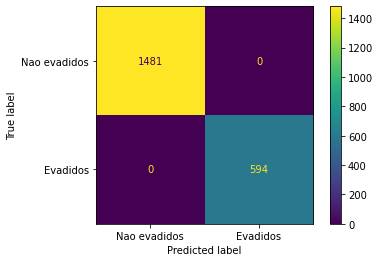

              precision    recall  f1-score   support

Nao evadidos       1.00      1.00      1.00      1481
    Evadidos       1.00      1.00      1.00       594

    accuracy                           1.00      2075
   macro avg       1.00      1.00      1.00      2075
weighted avg       1.00      1.00      1.00      2075



In [ ]:
cm = confusion_matrix(y, predictionsxg)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y, predictionsxg, target_names=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


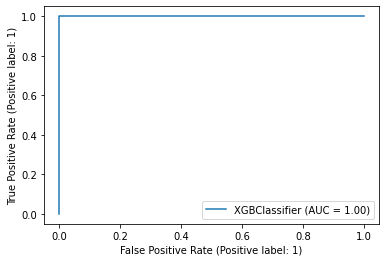

In [ ]:
plot_roc_curve(modelxg,x,y)

In [ ]:
modelrl = LogisticRegression(solver='lbfgs', max_iter=10000)
modelrl.fit(x, y)

LogisticRegression(max_iter=10000)

In [ ]:
predictionsrl = modelrl.predict(x)
print('Accuracy score = ',accuracy_score(y, predictionsrl))

Accuracy score =  0.8833734939759036


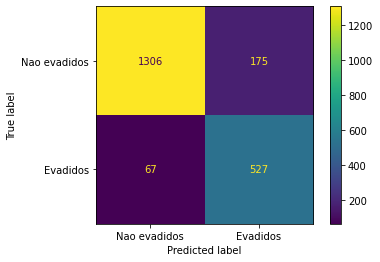

              precision    recall  f1-score   support

Nao evadidos       0.95      0.88      0.92      1481
    Evadidos       0.75      0.89      0.81       594

    accuracy                           0.88      2075
   macro avg       0.85      0.88      0.86      2075
weighted avg       0.89      0.88      0.89      2075



In [ ]:
cm = confusion_matrix(y, predictionsrl)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y, predictionsrl, target_names=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


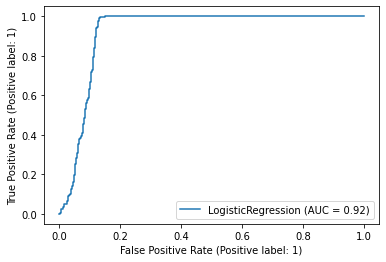

In [ ]:
plot_roc_curve(modelrl,x,y)

# Predição sem Validação cruzada e uso do Ano 2019 , 2020 e 2021 como diagnostico dos modelos

In [ ]:
Lista_final['ano_letivo_ini'].value_counts()

2016.0    297
2019.0    290
2018.0    288
2017.0    281
2015.0    276
2021.0    247
2020.0    237
2014.0    159
Name: ano_letivo_ini, dtype: int64

In [ ]:
Lista_final_teste = Lista_final.loc[Lista_final['ano_letivo_ini'] > 2018.0]

In [ ]:
Lista_final_treino = Lista_final.loc[Lista_final['ano_letivo_ini'] < 2019.0]

In [ ]:
Lista_final_teste['ano_letivo_ini'].values

array([2021., 2019., 2021., 2021., 2020., 2019., 2021., 2020., 2019.,
       2019., 2019., 2021., 2021., 2019., 2019., 2019., 2021., 2019.,
       2020., 2021., 2020., 2021., 2021., 2019., 2021., 2019., 2020.,
       2020., 2021., 2019., 2021., 2021., 2020., 2019., 2019., 2020.,
       2019., 2021., 2019., 2021., 2020., 2021., 2019., 2021., 2019.,
       2021., 2021., 2021., 2021., 2019., 2020., 2020., 2021., 2019.,
       2019., 2021., 2021., 2021., 2019., 2020., 2021., 2019., 2019.,
       2019., 2020., 2019., 2021., 2020., 2020., 2020., 2021., 2020.,
       2019., 2019., 2019., 2020., 2020., 2019., 2020., 2021., 2020.,
       2020., 2019., 2020., 2019., 2021., 2020., 2019., 2020., 2020.,
       2019., 2020., 2019., 2020., 2020., 2019., 2020., 2019., 2019.,
       2021., 2019., 2020., 2021., 2019., 2020., 2020., 2019., 2019.,
       2020., 2019., 2021., 2019., 2019., 2019., 2021., 2021., 2020.,
       2019., 2019., 2019., 2020., 2019., 2021., 2021., 2019., 2019.,
       2021., 2020.,

In [ ]:
Lista_final_treino['ano_letivo_ini'].values

array([2018., 2016., 2017., ..., 2015., 2016., 2014.])

In [ ]:
Lista_final_teste.head(3)

,qtd_periodos,coeficiente_rendimento,idade,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,classe,ama,bra,ind,nao,ndc,neg,par,f,m,técnico,integral,noturno,vespertino,brasileira,casado (a),divorciado (a),outros,separados,solteiro (a),união estável,anos_no_if
0,3.0,9.55,49.0,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0.0
1,3.0,5.36,23.0,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1.0
4,3.0,0.00,28.0,1.0,2.0,2021.0,1411.0,0.0,2.0,2021.0,371.0,225509.0,222479.0,Técnico,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0.0


In [ ]:
Lista_final_teste['anos_no_if'] = Lista_final_teste['ano_let_atual'] - Lista_final_teste['ano_letivo_ini']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Lista_final_teste.head(3)

,qtd_periodos,coeficiente_rendimento,idade,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,classe,ama,bra,ind,nao,ndc,neg,par,f,m,técnico,integral,noturno,vespertino,brasileira,casado (a),divorciado (a),outros,separados,solteiro (a),união estável,anos_no_if
0,3.0,9.55,49.0,2.0,2.0,2021.0,1420.0,0.0,1.0,2021.0,371.0,217267.0,215716.0,Técnico,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0.0
1,3.0,5.36,23.0,3.0,1.0,2020.0,1411.0,2.0,1.0,2019.0,371.0,184614.0,187863.0,Técnico,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1.0
4,3.0,0.00,28.0,1.0,2.0,2021.0,1411.0,0.0,2.0,2021.0,371.0,225509.0,222479.0,Técnico,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0.0


In [ ]:
Lista_final_treino.head(3)

,qtd_periodos,coeficiente_rendimento,idade,periodo_atual,periodo_let_atual,ano_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,ano_letivo_ini,matriz_estrutura_curso,cod_matricula,cod_pessoa,nivel_ensino,classe,ama,bra,ind,nao,ndc,neg,par,f,m,técnico,integral,noturno,vespertino,brasileira,casado (a),divorciado (a),outros,separados,solteiro (a),união estável,anos_no_if
2,3.0,5.82,49.0,3.0,2.0,2019.0,1411.0,9.0,2.0,2018.0,371.0,175945.0,180110.0,Técnico,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1.0
3,3.0,7.96,24.0,3.0,2.0,2019.0,1420.0,6.0,2.0,2016.0,371.0,147391.0,153219.0,Técnico,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,3.0
5,3.0,1.27,38.0,1.0,1.0,2017.0,1411.0,9.0,1.0,2017.0,371.0,155929.0,27866.0,Técnico,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0.0


In [ ]:
Lista_final_treino['anos_no_if'] = Lista_final_treino['ano_let_atual'] - Lista_final_treino['ano_letivo_ini']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Lista_final_teste = Lista_final_teste.drop(columns=['ano_let_atual','ano_letivo_ini','cod_matricula','cod_pessoa','nivel_ensino'])

In [ ]:
Lista_final_treino = Lista_final_treino.drop(columns=['ano_let_atual','ano_letivo_ini','cod_matricula','cod_pessoa','nivel_ensino'])


In [ ]:
Lista_final_treino.head(2)

,qtd_periodos,coeficiente_rendimento,idade,periodo_atual,periodo_let_atual,cod_curso,sit_matricula,periodo_letivo_ini,matriz_estrutura_curso,classe,ama,bra,ind,nao,ndc,neg,par,f,m,técnico,integral,noturno,vespertino,brasileira,casado (a),divorciado (a),outros,separados,solteiro (a),união estável,anos_no_if
2,3.0,5.82,49.0,3.0,2.0,1411.0,9.0,2.0,371.0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,1.0
3,3.0,7.96,24.0,3.0,2.0,1420.0,6.0,2.0,371.0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,3.0


# Verificar o tratamento da informaçã quanto a valores faltantes nas colunas aplicando moda - treino e teste

In [ ]:
Lista_final_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 2 to 2472
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            1301 non-null   float64
 1   coeficiente_rendimento  1301 non-null   float64
 2   idade                   1301 non-null   float64
 3   periodo_atual           1301 non-null   float64
 4   periodo_let_atual       1301 non-null   float64
 5   cod_curso               1301 non-null   float64
 6   sit_matricula           1301 non-null   float64
 7   periodo_letivo_ini      1301 non-null   float64
 8   matriz_estrutura_curso  1301 non-null   float64
 9   classe                  1301 non-null   int64  
 10  ama                     1301 non-null   uint8  
 11  bra                     1301 non-null   uint8  
 12  ind                     1301 non-null   uint8  
 13  nao                     1301 non-null   uint8  
 14  ndc                     1301 non-null   

In [ ]:
Lista_final_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 2464
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            774 non-null    float64
 1   coeficiente_rendimento  774 non-null    float64
 2   idade                   774 non-null    float64
 3   periodo_atual           774 non-null    float64
 4   periodo_let_atual       774 non-null    float64
 5   cod_curso               774 non-null    float64
 6   sit_matricula           774 non-null    float64
 7   periodo_letivo_ini      774 non-null    float64
 8   matriz_estrutura_curso  774 non-null    float64
 9   classe                  774 non-null    int64  
 10  ama                     774 non-null    uint8  
 11  bra                     774 non-null    uint8  
 12  ind                     774 non-null    uint8  
 13  nao                     774 non-null    uint8  
 14  ndc                     774 non-null    u

In [ ]:
mode(Lista_final_treino[10:29])

ModeResult(mode=array([[3.000e+00, 0.000e+00, 2.300e+01, 3.000e+00, 2.000e+00, 1.411e+03,
        6.000e+00, 2.000e+00, 3.710e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00]]), count=array([[19,  4,  3,  8, 10, 10,  7, 13, 19, 13, 19, 17, 18, 12, 19, 18,
        16, 10, 10, 19, 19, 13, 13, 19, 13, 19, 19, 19, 13, 19,  9]]))

In [ ]:
mode(Lista_final_treino[10:29]).mode[0]

array([3.000e+00, 0.000e+00, 2.300e+01, 3.000e+00, 2.000e+00, 1.411e+03,
       6.000e+00, 2.000e+00, 3.710e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00])

In [ ]:
Lista_final_treino['ama'].fillna(mode(Lista_final['ama']).mode[0], inplace=True)
Lista_final_treino['bra'].fillna(mode(Lista_final['bra']).mode[0], inplace=True)
Lista_final_treino['ind'].fillna(mode(Lista_final['ind']).mode[0], inplace=True)
Lista_final_treino['nao'].fillna(mode(Lista_final['nao']).mode[0], inplace=True)
Lista_final_treino['ndc'].fillna(mode(Lista_final['ndc']).mode[0], inplace=True)
Lista_final_treino['neg'].fillna(mode(Lista_final['neg']).mode[0], inplace=True)
Lista_final_treino['par'].fillna(mode(Lista_final['par']).mode[0], inplace=True)
Lista_final_treino['f'].fillna(mode(Lista_final['f']).mode[0], inplace=True)
Lista_final_treino['m'].fillna(mode(Lista_final['m']).mode[0], inplace=True)
Lista_final_treino['técnico'].fillna(mode(Lista_final['técnico']).mode[0], inplace=True)
Lista_final_treino['integral'].fillna(mode(Lista_final['integral']).mode[0], inplace=True)
Lista_final_treino['noturno'].fillna(mode(Lista_final['noturno']).mode[0], inplace=True)
Lista_final_treino['vespertino'].fillna(mode(Lista_final['vespertino']).mode[0],inplace=True)
Lista_final_treino['brasileira'].fillna(mode(Lista_final['brasileira']).mode[0],inplace=True)
Lista_final_treino['casado (a)'].fillna(mode(Lista_final['casado (a)']).mode[0],inplace=True)
Lista_final_treino['divorciado (a)'].fillna(mode(Lista_final['divorciado (a)']).mode[0],inplace=True)
Lista_final_treino['outros'].fillna(mode(Lista_final['outros']).mode[0],inplace=True)
Lista_final_treino['separados'].fillna(mode(Lista_final['separados']).mode[0],inplace=True)
Lista_final_treino['solteiro (a)'].fillna(mode(Lista_final['solteiro (a)']).mode[0],inplace=True)
Lista_final_treino['união estável'].fillna(mode(Lista_final['união estável']).mode[0],inplace=True)
Lista_final_treino['anos_no_if'].fillna(mode(Lista_final['anos_no_if']).mode[0],inplace=True)

In [ ]:
Lista_final_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 2 to 2472
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            1301 non-null   float64
 1   coeficiente_rendimento  1301 non-null   float64
 2   idade                   1301 non-null   float64
 3   periodo_atual           1301 non-null   float64
 4   periodo_let_atual       1301 non-null   float64
 5   cod_curso               1301 non-null   float64
 6   sit_matricula           1301 non-null   float64
 7   periodo_letivo_ini      1301 non-null   float64
 8   matriz_estrutura_curso  1301 non-null   float64
 9   classe                  1301 non-null   int64  
 10  ama                     1301 non-null   uint8  
 11  bra                     1301 non-null   uint8  
 12  ind                     1301 non-null   uint8  
 13  nao                     1301 non-null   uint8  
 14  ndc                     1301 non-null   

In [ ]:
mode(Lista_final_teste[10:29])

ModeResult(mode=array([[3.000e+00, 0.000e+00, 2.100e+01, 1.000e+00, 2.000e+00, 1.411e+03,
        0.000e+00, 2.000e+00, 3.710e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00]]), count=array([[19,  9,  3, 16, 13, 10, 10, 11, 19, 14, 17, 14, 19, 19, 19, 15,
        11, 10, 10, 19, 19, 11, 11, 19, 19, 18, 19, 19, 17, 18, 15]]))

In [ ]:
mode(Lista_final_teste[10:29]).mode[0]

array([3.000e+00, 0.000e+00, 2.100e+01, 1.000e+00, 2.000e+00, 1.411e+03,
       0.000e+00, 2.000e+00, 3.710e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00])

In [ ]:
Lista_final_teste['ama'].fillna(mode(Lista_final['ama']).mode[0], inplace=True)
Lista_final_teste['bra'].fillna(mode(Lista_final['bra']).mode[0], inplace=True)
Lista_final_teste['ind'].fillna(mode(Lista_final['ind']).mode[0], inplace=True)
Lista_final_teste['nao'].fillna(mode(Lista_final['nao']).mode[0], inplace=True)
Lista_final_teste['ndc'].fillna(mode(Lista_final['ndc']).mode[0], inplace=True)
Lista_final_teste['neg'].fillna(mode(Lista_final['neg']).mode[0], inplace=True)
Lista_final_teste['par'].fillna(mode(Lista_final['par']).mode[0], inplace=True)
Lista_final_teste['f'].fillna(mode(Lista_final['f']).mode[0], inplace=True)
Lista_final_teste['m'].fillna(mode(Lista_final['m']).mode[0], inplace=True)
Lista_final_teste['técnico'].fillna(mode(Lista_final['técnico']).mode[0], inplace=True)
Lista_final_teste['integral'].fillna(mode(Lista_final['integral']).mode[0], inplace=True)
Lista_final_teste['noturno'].fillna(mode(Lista_final['noturno']).mode[0], inplace=True)
Lista_final_teste['vespertino'].fillna(mode(Lista_final['vespertino']).mode[0],inplace=True)
Lista_final_teste['brasileira'].fillna(mode(Lista_final['brasileira']).mode[0],inplace=True)
Lista_final_teste['casado (a)'].fillna(mode(Lista_final['casado (a)']).mode[0],inplace=True)
Lista_final_teste['divorciado (a)'].fillna(mode(Lista_final['divorciado (a)']).mode[0],inplace=True)
Lista_final_teste['outros'].fillna(mode(Lista_final['outros']).mode[0],inplace=True)
Lista_final_teste['separados'].fillna(mode(Lista_final['separados']).mode[0],inplace=True)
Lista_final_teste['solteiro (a)'].fillna(mode(Lista_final['solteiro (a)']).mode[0],inplace=True)
Lista_final_teste['união estável'].fillna(mode(Lista_final['união estável']).mode[0],inplace=True)
Lista_final_teste['anos_no_if'].fillna(mode(Lista_final['anos_no_if']).mode[0],inplace=True)

In [ ]:
Lista_final_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 2464
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   qtd_periodos            774 non-null    float64
 1   coeficiente_rendimento  774 non-null    float64
 2   idade                   774 non-null    float64
 3   periodo_atual           774 non-null    float64
 4   periodo_let_atual       774 non-null    float64
 5   cod_curso               774 non-null    float64
 6   sit_matricula           774 non-null    float64
 7   periodo_letivo_ini      774 non-null    float64
 8   matriz_estrutura_curso  774 non-null    float64
 9   classe                  774 non-null    int64  
 10  ama                     774 non-null    uint8  
 11  bra                     774 non-null    uint8  
 12  ind                     774 non-null    uint8  
 13  nao                     774 non-null    uint8  
 14  ndc                     774 non-null    u

In [ ]:
Xtr =Lista_final_treino.values
Xtr

array([[ 3.  ,  5.82, 49.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  7.96, 24.  , ...,  1.  ,  0.  ,  3.  ],
       [ 3.  ,  1.27, 38.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
Yte = Lista_final_teste.values
Yte

array([[ 3.  ,  9.55, 49.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  5.36, 23.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  0.  , 28.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  6.8 , 20.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.  , 26.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.26, 20.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
Lista_final_treino.isnull().sum()

qtd_periodos              0
coeficiente_rendimento    0
idade                     0
periodo_atual             0
periodo_let_atual         0
cod_curso                 0
sit_matricula             0
periodo_letivo_ini        0
matriz_estrutura_curso    0
classe                    0
ama                       0
bra                       0
ind                       0
nao                       0
ndc                       0
neg                       0
par                       0
f                         0
m                         0
técnico                   0
integral                  0
noturno                   0
vespertino                0
brasileira                0
casado (a)                0
divorciado (a)            0
outros                    0
separados                 0
solteiro (a)              0
união estável             0
anos_no_if                0
dtype: int64

In [ ]:
Lista_final_teste.isnull().sum()

qtd_periodos              0
coeficiente_rendimento    0
idade                     0
periodo_atual             0
periodo_let_atual         0
cod_curso                 0
sit_matricula             0
periodo_letivo_ini        0
matriz_estrutura_curso    0
classe                    0
ama                       0
bra                       0
ind                       0
nao                       0
ndc                       0
neg                       0
par                       0
f                         0
m                         0
técnico                   0
integral                  0
noturno                   0
vespertino                0
brasileira                0
casado (a)                0
divorciado (a)            0
outros                    0
separados                 0
solteiro (a)              0
união estável             0
anos_no_if                0
dtype: int64

In [ ]:
Xtr =Lista_final_treino.values
Xtr

array([[ 3.  ,  5.82, 49.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  7.96, 24.  , ...,  1.  ,  0.  ,  3.  ],
       [ 3.  ,  1.27, 38.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
Yte = Lista_final_teste.values
Yte

array([[ 3.  ,  9.55, 49.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  5.36, 23.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  0.  , 28.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  6.8 , 20.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.  , 26.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.26, 20.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
Xtr.shape,Yte.shape

((1301, 31), (774, 31))

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [ ]:
featurestr = [i for i in Lista_final_treino.columns if i != 'classe']
featurestr

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'sit_matricula',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
xtr =Lista_final_treino[features].values
xtr

array([[ 3.  ,  5.82, 49.  , ...,  0.  ,  0.  ,  1.  ],
       [ 3.  ,  7.96, 24.  , ...,  1.  ,  0.  ,  3.  ],
       [ 3.  ,  1.27, 38.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  0.  , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 3.  ,  0.69, 55.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.19, 32.  , ...,  1.  ,  0.  ,  1.  ]])

In [ ]:
ytr =Lista_final_treino['classe'].values
ytr

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
featureste = [i for i in Lista_final_teste.columns if i != 'classe']
featureste

['qtd_periodos',
 'coeficiente_rendimento',
 'idade',
 'periodo_atual',
 'periodo_let_atual',
 'cod_curso',
 'sit_matricula',
 'periodo_letivo_ini',
 'matriz_estrutura_curso',
 'ama',
 'bra',
 'ind',
 'nao',
 'ndc',
 'neg',
 'par',
 'f',
 'm',
 'técnico',
 'integral',
 'noturno',
 'vespertino',
 'brasileira',
 'casado (a)',
 'divorciado (a)',
 'outros',
 'separados',
 'solteiro (a)',
 'união estável',
 'anos_no_if']

In [ ]:
xte=Lista_final_teste[features].values
xte

array([[ 3.  ,  9.55, 49.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  5.36, 23.  , ...,  1.  ,  0.  ,  1.  ],
       [ 3.  ,  0.  , 28.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 3.  ,  6.8 , 20.  , ...,  1.  ,  0.  ,  2.  ],
       [ 3.  ,  0.  , 26.  , ...,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.26, 20.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
yte =Lista_final_teste['classe'].values
yte

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
#X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)

# Criação dos Modelos - treino < 2019 & teste > 2018

In [ ]:
models = []
models.append(("LR", LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(("RF", RandomForestClassifier()))
models.append(("NB", GaussianNB()))
models.append(("XG", xgb.XGBClassifier(objective="binary:logistic", random_state=42)))

Treinando o modelo usando dados de treino

In [ ]:
resultsfit = []
namesfit = []
for name, model in models:
    cv_results = model.fit(xtr,ytr)
    resultsfit.append(cv_results)
    namesfit.append(name)
    print(cv_results)

LogisticRegression(max_iter=10000)
RandomForestClassifier()
GaussianNB()
XGBClassifier(random_state=42)


In [ ]:
resultspr = []
namespr = []
for name, model in models:
    y_pred= model.predict(xte)
    resultspr.append(y_pred)
    namespr.append(name)
    print(y_pred)



[0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 

In [ ]:
print("Relatório de Classificação:\n", classification_report(yte, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       664
           1     1.0000    1.0000    1.0000       110

    accuracy                         1.0000       774
   macro avg     1.0000    1.0000    1.0000       774
weighted avg     1.0000    1.0000    1.0000       774



In [ ]:
plot_roc_curve('RL',xte,yte)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

Treinando os modelos

In [ ]:
modelrl = LogisticRegression(solver='lbfgs',max_iter=1000)
modelrl.fit(xtr, ytr)

LogisticRegression(max_iter=1000)

In [ ]:
modelrandonforest = RandomForestClassifier(random_state=42)
modelrandonforest.fit(xtr, ytr)

RandomForestClassifier(random_state=42)

In [ ]:
modelnb= GaussianNB()
modelnb.fit(xtr, ytr)

GaussianNB()

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(xtr, ytr)

XGBClassifier(random_state=42)

# Predição nos conjuntos de testes > 2018

In [ ]:
predictionsrl =modelrl.predict(xte)

In [ ]:
predictionsrf =modelrandonforest.predict(xte)

In [ ]:
predictionsnb =modelnb.predict(xte)

In [ ]:
predictionsxg =xgb_model.predict(xte)

# Matriz de Confusao 

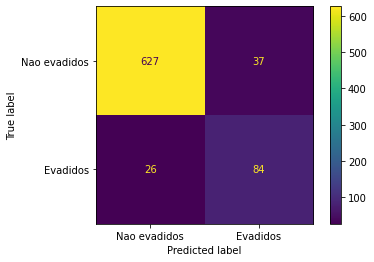

              precision    recall  f1-score   support

Nao evadidos       0.96      0.94      0.95       664
    Evadidos       0.69      0.76      0.73       110

    accuracy                           0.92       774
   macro avg       0.83      0.85      0.84       774
weighted avg       0.92      0.92      0.92       774



In [ ]:
cm = confusion_matrix(yte, predictionsrl)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(yte, predictionsrl, target_names=labels))

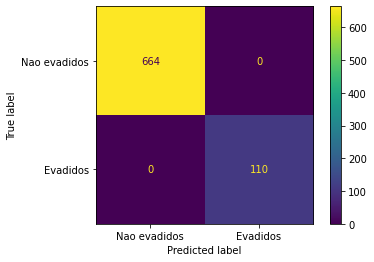

              precision    recall  f1-score   support

Nao evadidos       1.00      1.00      1.00       664
    Evadidos       1.00      1.00      1.00       110

    accuracy                           1.00       774
   macro avg       1.00      1.00      1.00       774
weighted avg       1.00      1.00      1.00       774



In [ ]:
cm = confusion_matrix(yte, predictionsrf)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(yte, predictionsrf, target_names=labels))

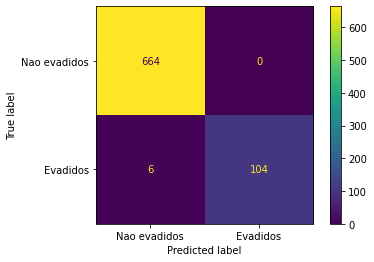

              precision    recall  f1-score   support

Nao evadidos       0.99      1.00      1.00       664
    Evadidos       1.00      0.95      0.97       110

    accuracy                           0.99       774
   macro avg       1.00      0.97      0.98       774
weighted avg       0.99      0.99      0.99       774



In [ ]:
cm = confusion_matrix(yte,predictionsnb)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(yte, predictionsnb, target_names=labels))

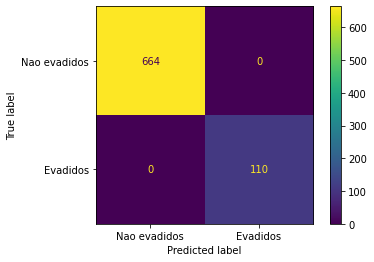

              precision    recall  f1-score   support

Nao evadidos       1.00      1.00      1.00       664
    Evadidos       1.00      1.00      1.00       110

    accuracy                           1.00       774
   macro avg       1.00      1.00      1.00       774
weighted avg       1.00      1.00      1.00       774



In [ ]:
cm = confusion_matrix(yte,predictionsxg)
labels = ['Nao evadidos', 'Evadidos']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(yte, predictionsxg, target_names=labels))

Curva ROC
